In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to your dataset inside Drive
path = "/content/drive/MyDrive/Feature_Selection/winequalityN.csv"

df = pd.read_csv(path)
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df2 = df.copy()

# Encode 'type'
df2['type'] = df2['type'].astype('category').cat.codes

# Remove missing rows
df2 = df2.dropna()

X = df2.drop('quality', axis=1)
y = df2['quality']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'feature': X.columns,
    'gini_importance': rf.feature_importances_
}).sort_values(by='gini_importance', ascending=False)

importances


,feature,gini_importance
11,alcohol,0.118775
8,density,0.103901
2,volatile acidity,0.099561
7,total sulfur dioxide,0.090436
6,free sulfur dioxide,0.087747
5,chlorides,0.087488
4,residual sugar,0.086192
10,sulphates,0.083863
9,pH,0.083646
3,citric acid,0.079671


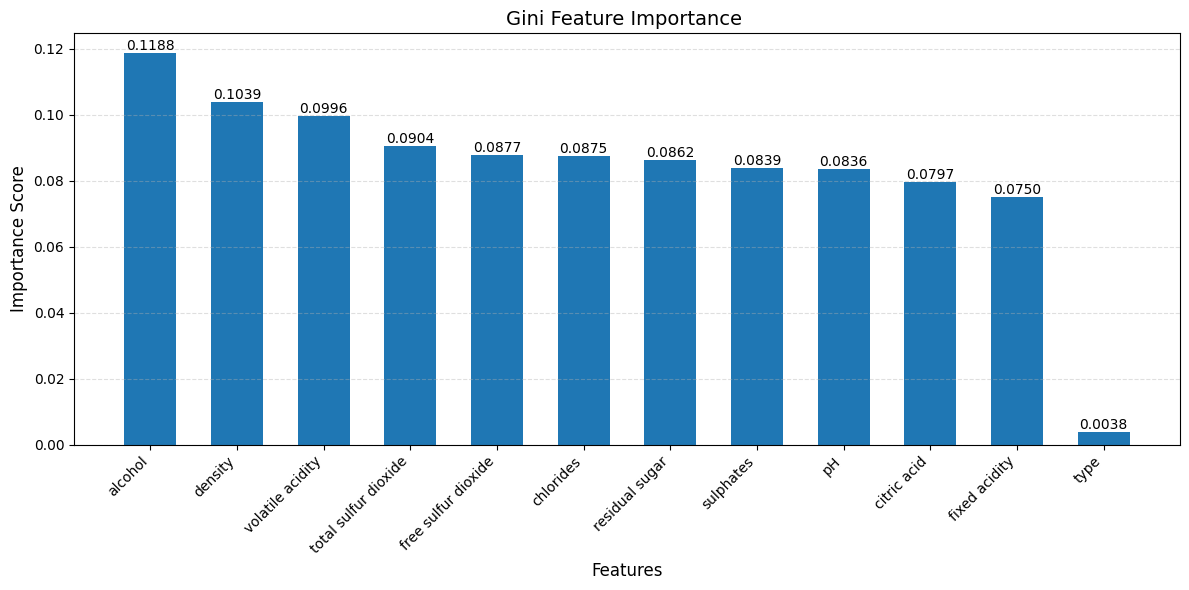

In [ ]:
import matplotlib.pyplot as plt

# Feature names
features = [
    "alcohol",
    "density",
    "volatile acidity",
    "total sulfur dioxide",
    "free sulfur dioxide",
    "chlorides",
    "residual sugar",
    "sulphates",
    "pH",
    "citric acid",
    "fixed acidity",
    "type"
]

# Importance values
importance = [
    0.118775,
    0.103901,
    0.099561,
    0.090436,
    0.087747,
    0.087488,
    0.086192,
    0.083863,
    0.083646,
    0.079671,
    0.074967,
    0.003753
]

plt.figure(figsize=(12, 6))

# Column chart
plt.bar(range(len(features)), importance, width=0.6)

# X-axis labels
plt.xticks(range(len(features)), features, rotation=45, ha='right')

plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)
plt.title("Gini Feature Importance ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value labels on top of each column
for i, v in enumerate(importance):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d6fb2c5458f4b9a7a81c67a0e4bf25e30bf6345dc91566fede1379b1a6b91550
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Feature_Selection/winequalityN.csv"
df = pd.read_csv(path)

df = df.dropna()


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
target = "quality"

X = df.drop(columns=[target])
y = df[target]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
explainer = LimeTabularExplainer(
    training_data=np.array(X),
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    mode="classification"
)


In [ ]:
lime_scores = {f: 0 for f in X.columns}

num_samples = min(100, len(X))

for i in range(num_samples):
    exp = explainer.explain_instance(
        X.values[i],
        rf.predict_proba
    )

    for feat, weight in exp.as_list():
        # Extract full feature name BEFORE inequality sign
        feature_name = feat.split(" <")[0].split(" >")[0].split(" <=")[0].split(" >=")[0]

        if feature_name in lime_scores:
            lime_scores[feature_name] += abs(weight)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

In [ ]:
# Pick one sample from the test set
i = 0
x_instance = X_test.iloc[i]

# Explain the prediction for this instance
exp = explainer.explain_instance(
    x_instance.values,
    rf.predict_proba
)

# Show the local explanation
exp.show_in_notebook(show_table=True)

# Extract top 5 important features for this instance
local_features = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)[:5]

print(f"Top 5 local features for instance {i}:")
for feat, weight in local_features:
    print(f"{feat}: {weight:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Top 5 local features for instance 0:
0.23 < volatile acidity <= 0.29: -0.0139
residual sugar <= 1.80: 0.0121
17.00 < free sulfur dioxide <= 29.00: -0.0110
0.25 < citric acid <= 0.31: -0.0070
118.00 < total sulfur dioxide <= 156.00: -0.0059


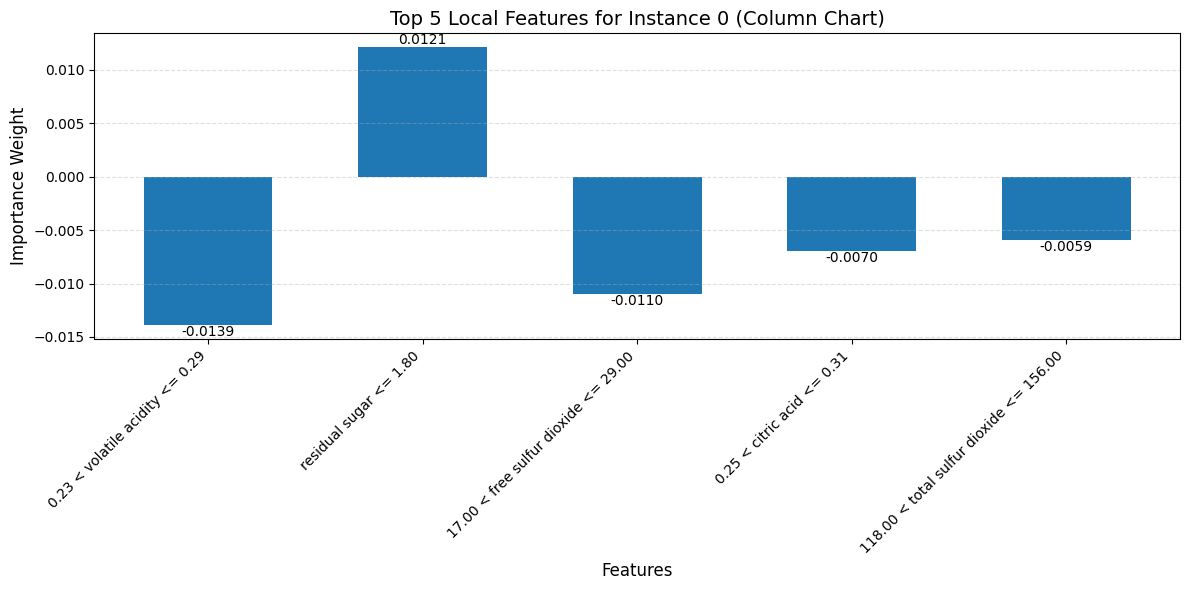

In [ ]:
import matplotlib.pyplot as plt

# Feature names
features = [
    "0.23 < volatile acidity <= 0.29",
    "residual sugar <= 1.80",
    "17.00 < free sulfur dioxide <= 29.00",
    "0.25 < citric acid <= 0.31",
    "118.00 < total sulfur dioxide <= 156.00"
]

# Corresponding importance values
importance = [-0.0139, 0.0121, -0.0110, -0.0070, -0.0059]

plt.figure(figsize=(12, 6))

# Column chart (vertical bars)
plt.bar(range(len(features)), importance, width=0.6)

# X-tick labels
plt.xticks(range(len(features)), features, rotation=45, ha='right')

plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Weight", fontsize=12)
plt.title("Top 5 Local Features for Instance 0 (Column Chart)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add values on columns
for i, v in enumerate(importance):
    plt.text(i, v, f"{v:.4f}", ha='center',
             va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()


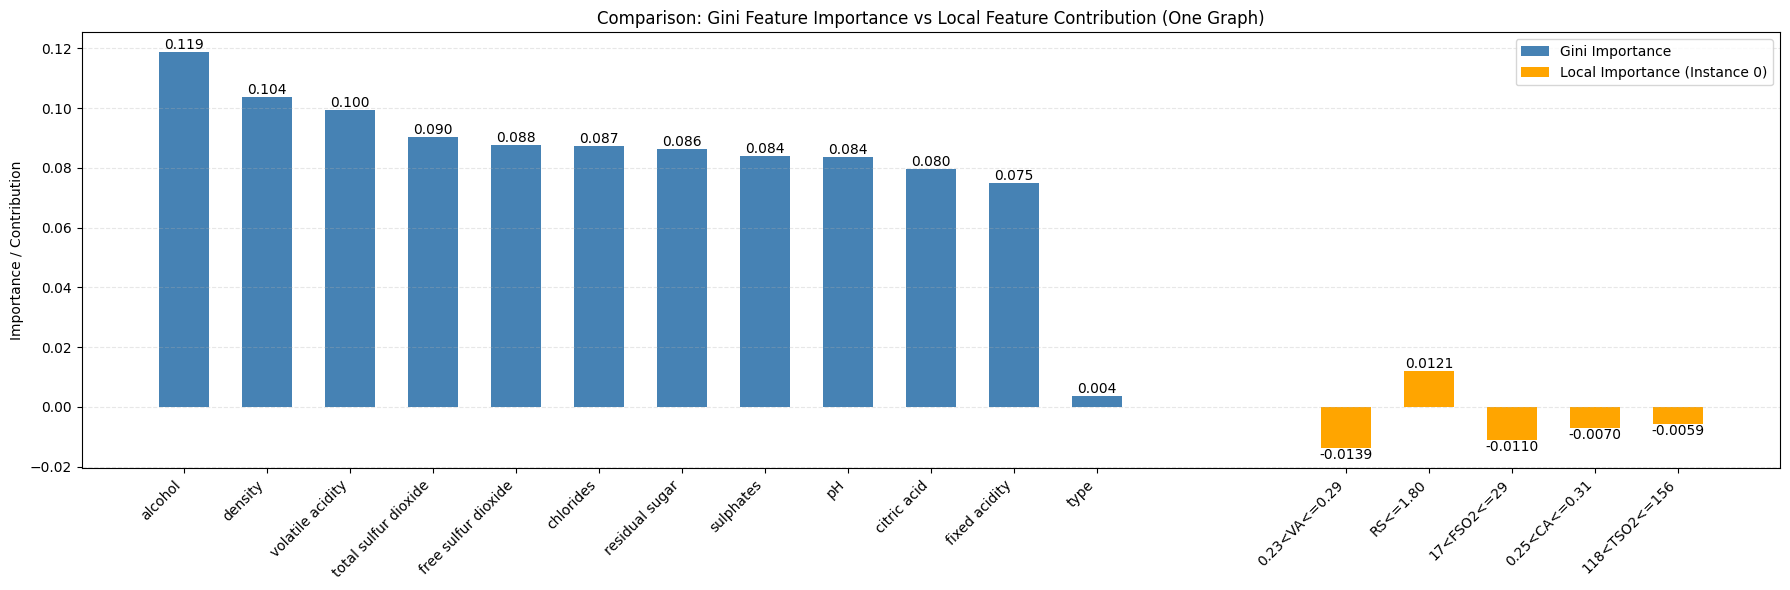

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------- Gini Importance (12 features) --------
gini_features = [
    "alcohol","density","volatile acidity","total sulfur dioxide",
    "free sulfur dioxide","chlorides","residual sugar","sulphates",
    "pH","citric acid","fixed acidity","type"
]

gini_importance = [
    0.118775,0.103901,0.099561,0.090436,
    0.087747,0.087488,0.086192,0.083863,
    0.083646,0.079671,0.074967,0.003753
]

# -------- Local Top-5 --------
local_features = [
    "0.23<VA<=0.29",
    "RS<=1.80",
    "17<FSO2<=29",
    "0.25<CA<=0.31",
    "118<TSO2<=156"
]

local_importance = [-0.0139, 0.0121, -0.0110, -0.0070, -0.0059]

# Create x positions with a gap between groups
gini_x = np.arange(len(gini_features))
local_x = np.arange(len(local_features)) + len(gini_features) + 2  # gap between groups

plt.figure(figsize=(18, 6))

# Plot Gini group
plt.bar(gini_x, gini_importance, width=0.6, color='steelblue', label="Gini Importance")

# Plot Local group
plt.bar(local_x, local_importance, width=0.6, color='orange', label="Local Importance (Instance 0)")

# Combine x labels
all_x = np.concatenate([gini_x, local_x])
all_labels = gini_features + local_features

plt.xticks(all_x, all_labels, rotation=45, ha='right')

plt.ylabel("Importance / Contribution")
plt.title("Comparison: Gini Feature Importance vs Local Feature Contribution (One Graph)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()

# Add text labels
for i, val in enumerate(gini_importance):
    plt.text(i, val, f"{val:.3f}", ha='center', va='bottom')

for i, val in zip(local_x, local_importance):
    plt.text(i, val, f"{val:.4f}", ha='center', va='bottom' if val > 0 else 'top')

plt.tight_layout()
plt.show()


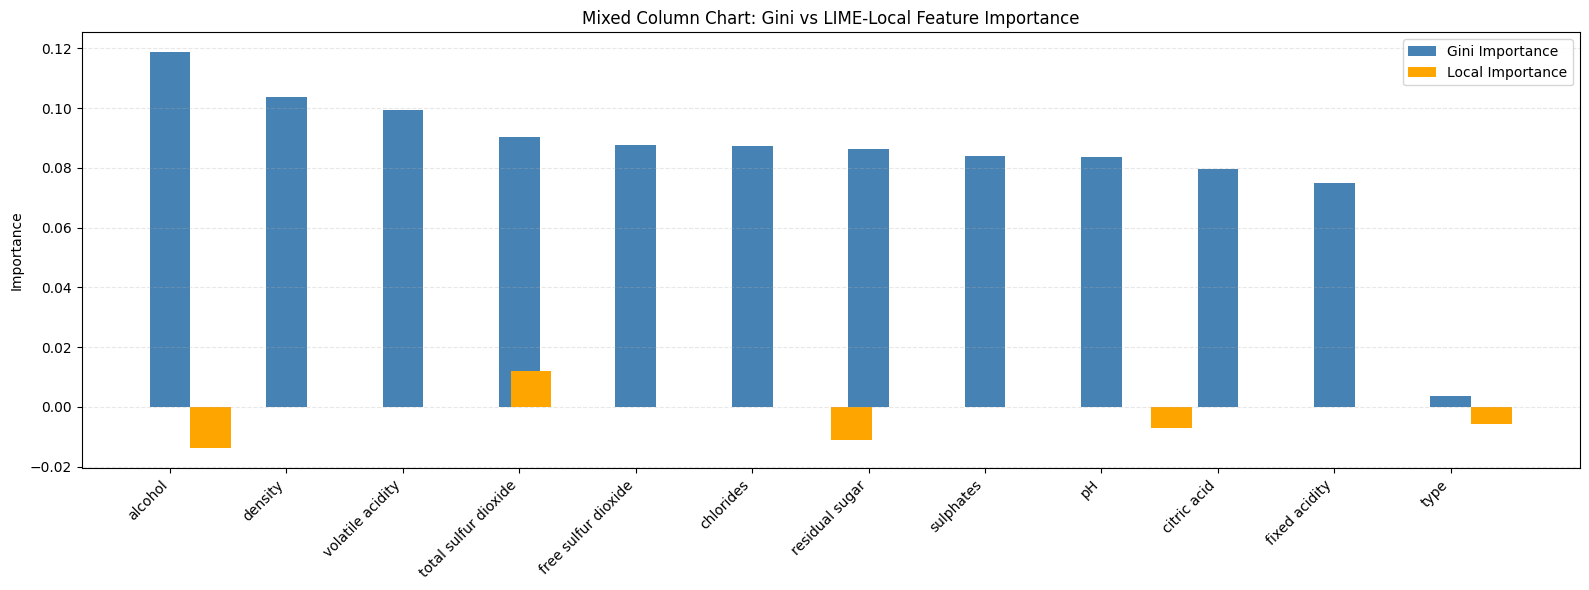

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gini Importance (12 features)
gini_features = [
    "alcohol","density","volatile acidity","total sulfur dioxide",
    "free sulfur dioxide","chlorides","residual sugar","sulphates",
    "pH","citric acid","fixed acidity","type"
]

gini_values = [
    0.118775,0.103901,0.099561,0.090436,
    0.087747,0.087488,0.086192,0.083863,
    0.083646,0.079671,0.074967,0.003753
]

# Local Importance (5 features)
local_features = [
    "0.23<VA<=0.29",
    "RS<=1.80",
    "17<FSO2<=29",
    "0.25<CA<=0.31",
    "118<TSO2<=156"
]

local_values = [-0.0139, 0.0121, -0.0110, -0.0070, -0.0059]

# Mix x positions
x_gini = np.arange(len(gini_values))
x_local = np.linspace(0, len(gini_values)-1, len(local_values))

plt.figure(figsize=(16, 6))

# Plot Gini (blue)
plt.bar(x_gini, gini_values, width=0.35, label="Gini Importance", color="steelblue")

# Plot Local (orange)
plt.bar(x_local + 0.35, local_values, width=0.35, label="Local Importance", color="orange")

# Create x-axis labels
x_all = np.arange(len(gini_values))
labels_all = gini_features

plt.xticks(x_all, labels_all, rotation=45, ha='right')

plt.ylabel("Importance")
plt.title("Mixed Column Chart: Gini vs LIME-Local Feature Importance")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
lime_df = pd.DataFrame({
    "Feature": lime_scores.keys(),
    "LIME_Importance": lime_scores.values()
}).sort_values("LIME_Importance", ascending=False)

print("\n🔍 LIME Global Feature Importance:")
print(lime_df)



🔍 LIME Global Feature Importance:
                 Feature  LIME_Importance
2       volatile acidity         1.557706
6    free sulfur dioxide         1.427646
11               alcohol         1.110033
4         residual sugar         0.773723
10             sulphates         0.457575
3            citric acid         0.433934
8                density         0.264568
1          fixed acidity         0.188197
9                     pH         0.108209
7   total sulfur dioxide         0.091400
5              chlorides         0.047455
0                   type         0.000000


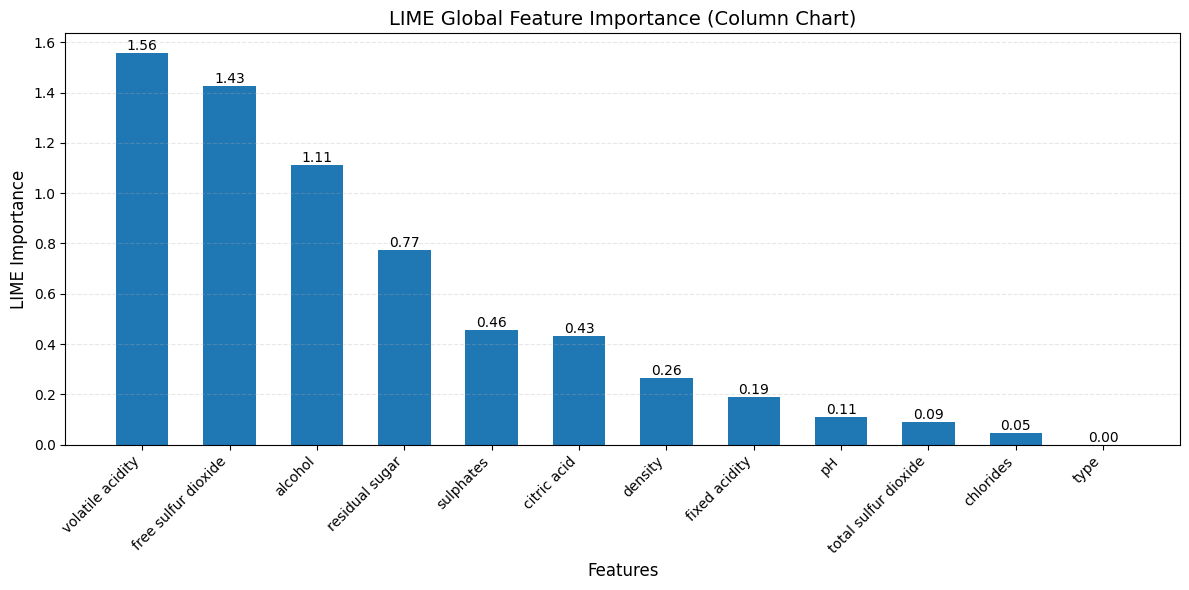

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data provided by the user
data = {
    "Feature": [
        "volatile acidity", "free sulfur dioxide", "alcohol",
        "residual sugar", "sulphates", "citric acid", "density",
        "fixed acidity", "pH", "total sulfur dioxide", "chlorides", "type"
    ],
    "LIME_Importance": [
        1.557706, 1.427646, 1.110033, 0.773723, 0.457575,
        0.433934, 0.264568, 0.188197, 0.108209, 0.091400,
        0.047455, 0.000000
    ]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

# Vertical column chart
plt.bar(df["Feature"], df["LIME_Importance"], width=0.6)

plt.xticks(rotation=45, ha='right')
plt.xlabel("Features", fontsize=12)
plt.ylabel("LIME Importance", fontsize=12)
plt.title("LIME Global Feature Importance (Column Chart)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adding value labels
for i, v in enumerate(df["LIME_Importance"]):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


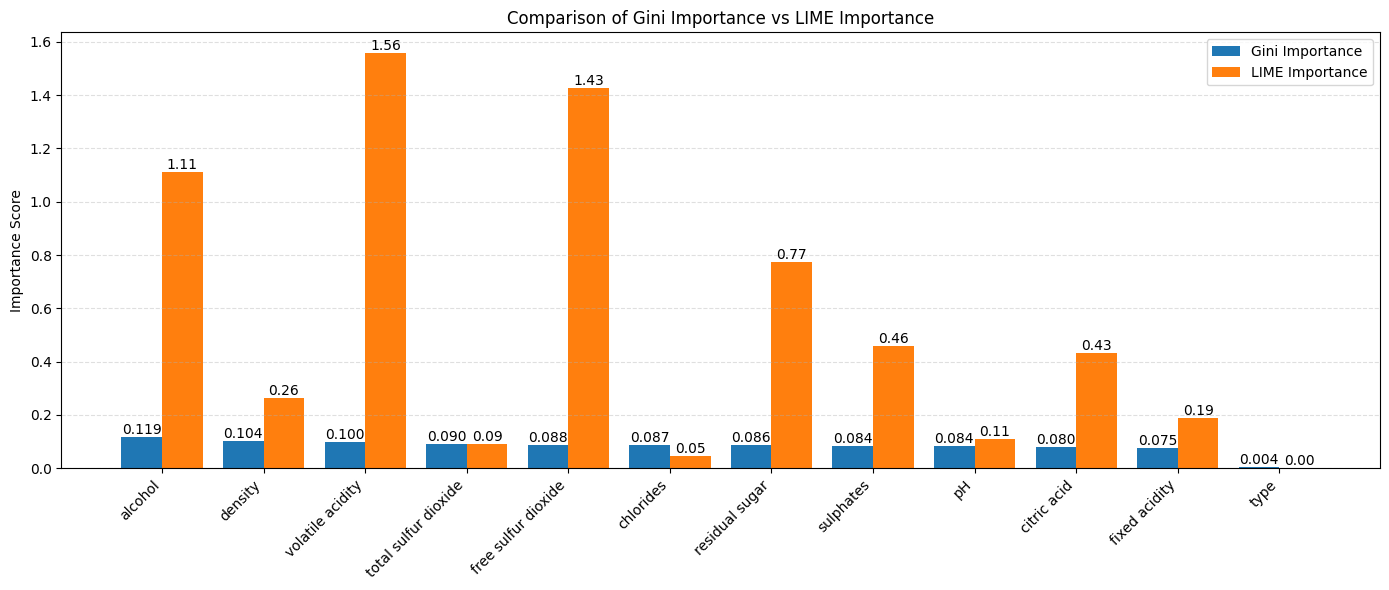

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Gini Importance Data
gini_features = [
    "alcohol", "density", "volatile acidity", "total sulfur dioxide",
    "free sulfur dioxide", "chlorides", "residual sugar", "sulphates",
    "pH", "citric acid", "fixed acidity", "type"
]

gini_values = [
    0.118775, 0.103901, 0.099561, 0.090436,
    0.087747, 0.087488, 0.086192, 0.083863,
    0.083646, 0.079671, 0.074967, 0.003753
]
# LIME Importance Data
lime_values = [
    1.110033, 0.264568, 1.557706, 0.091400,
    1.427646, 0.047455, 0.773723, 0.457575,
    0.108209, 0.433934, 0.188197, 0.000000
]
# Create Comparison Plot
x = np.arange(len(gini_features))
width = 0.4

plt.figure(figsize=(14, 6))

# Bars
plt.bar(x - width/2, gini_values, width, label="Gini Importance")
plt.bar(x + width/2, lime_values,  width, label="LIME Importance")

plt.xticks(x, gini_features, rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.title("Comparison of Gini Importance vs LIME Importance")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()

# Value labels
for i, v in enumerate(gini_values):
    plt.text(i - width/2, v, f"{v:.3f}", ha='center', va='bottom')

for i, v in enumerate(lime_values):
    plt.text(i + width/2, v, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Gini importance (all features)
gini_data = {
    "feature": [
        "alcohol", "density", "volatile acidity", "total sulfur dioxide",
        "free sulfur dioxide", "chlorides", "residual sugar",
        "sulphates", "pH", "citric acid", "fixed acidity", "type"
    ],
    "gini_importance": [
        0.118775, 0.103901, 0.099561, 0.090436, 0.087747, 0.087488,
        0.086192, 0.083863, 0.083646, 0.079671, 0.074967, 0.003753
    ]
}

# Local LIME (top 5 features for instance 0)
local_lime_data = {
    "volatile acidity": -0.0139,
    "residual sugar": 0.0121,
    "free sulfur dioxide": -0.0110,
    "citric acid": -0.0070,
    "total sulfur dioxide": -0.0059
}

# Global LIME importance (all features)
global_lime_data = {
    "volatile acidity": 1.557706,
    "free sulfur dioxide": 1.427646,
    "alcohol": 1.110033,
    "residual sugar": 0.773723,
    "sulphates": 0.457575,
    "citric acid": 0.433934,
    "density": 0.264568,
    "fixed acidity": 0.188197,
    "pH": 0.108209,
    "total sulfur dioxide": 0.091400,
    "chlorides": 0.047455,
    "type": 0.000000
}

# Create DataFrame for Gini importance
df = pd.DataFrame(gini_data)

# Map Local LIME values; fill missing with '-'
df['local_lime'] = df['feature'].map(local_lime_data).fillna('-')

# Map Global LIME values; fill missing with '-'
df['global_lime'] = df['feature'].map(global_lime_data).fillna('-')

# Reorder columns: Feature | Local LIME | Global LIME | Gini Importance
df = df[['feature', 'local_lime', 'global_lime', 'gini_importance']]

# Display table
print(df)


                 feature local_lime  global_lime  gini_importance
0                alcohol          -     1.110033         0.118775
1                density          -     0.264568         0.103901
2       volatile acidity    -0.0139     1.557706         0.099561
3   total sulfur dioxide    -0.0059     0.091400         0.090436
4    free sulfur dioxide     -0.011     1.427646         0.087747
5              chlorides          -     0.047455         0.087488
6         residual sugar     0.0121     0.773723         0.086192
7              sulphates          -     0.457575         0.083863
8                     pH          -     0.108209         0.083646
9            citric acid     -0.007     0.433934         0.079671
10         fixed acidity          -     0.188197         0.074967
11                  type          -     0.000000         0.003753


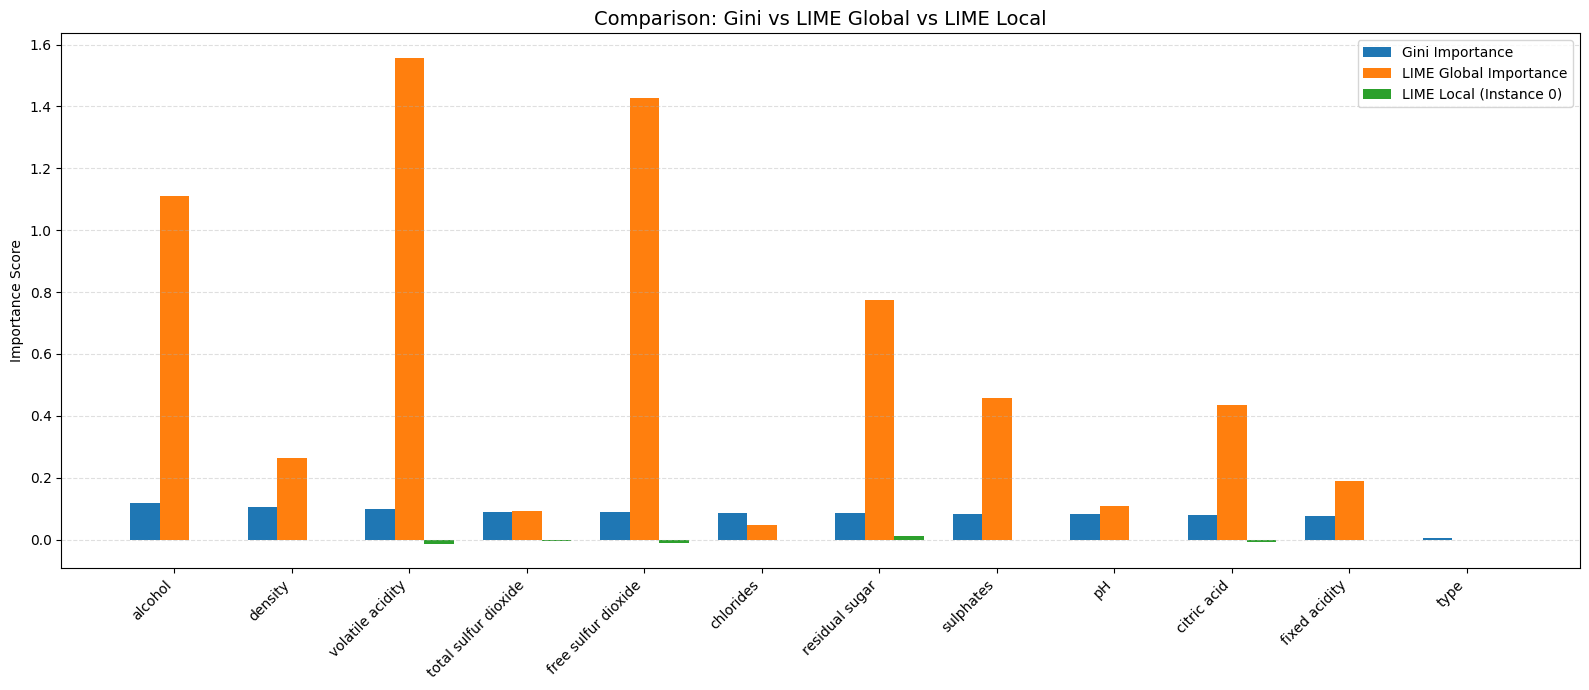

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Global Gini Importance
gini_features = [
    "alcohol", "density", "volatile acidity", "total sulfur dioxide",
    "free sulfur dioxide", "chlorides", "residual sugar", "sulphates",
    "pH", "citric acid", "fixed acidity", "type"
]

gini_values = [
    0.118775, 0.103901, 0.099561, 0.090436,
    0.087747, 0.087488, 0.086192, 0.083863,
    0.083646, 0.079671, 0.074967, 0.003753
]
# Global LIME Importance
# (aligned in SAME feature order)
lime_values = [
    1.110033, 0.264568, 1.557706, 0.091400,
    1.427646, 0.047455, 0.773723, 0.457575,
    0.108209, 0.433934, 0.188197, 0.000000
]
# Local LIME Top 5 (rest = 0)
local_dict = {
    "volatile acidity": -0.0139,
    "residual sugar": 0.0121,
    "free sulfur dioxide": -0.0110,
    "citric acid": -0.0070,
    "total sulfur dioxide": -0.0059
}

# Create local values aligned to global feature order
local_values = [local_dict.get(f, 0) for f in gini_features]
# Plotting
x = np.arange(len(gini_features))
width = 0.25

plt.figure(figsize=(16, 7))

# 3-bar comparison per feature
plt.bar(x - width, gini_values, width, label="Gini Importance")
plt.bar(x,        lime_values, width, label="LIME Global Importance")
plt.bar(x + width, local_values, width, label="LIME Local (Instance 0)")

plt.xticks(x, gini_features, rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.title("Comparison: Gini vs LIME Global vs LIME Local", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()
